#  How a decision tree works

### This notebook shows basic binary outcome decision tree algorithm from scratch. It also creates a decision tree regressor.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A decision tree predicts data by asking a series of binary questions. Is the data in this column greater than or less than this value? If less proceed to the left node, if greater proceed to the right. Once an end condition is met, which for this example will be that all leafs have at least 5 observations, that branch is terminated and the prediction at that leaf is then determined by the majority class or average value of all data in the leaf.

### Determining the split point

We want to determine split points by finding the column in the data and the point in that column where splitting the data gives us the most information. How do we define information gain? 

Well we want the leafs in our tree to be as homogenous as possible. Consider a data set with 50 % cClass 1 and 50% Class 2. Blindly picking an observation in this row yields a totally random result. By comparison, if the result were all or mostly Class 1, there would be no or little randomness to the outcome.

This can be represented by the entropy function. If we define p1 as the percentage of observations with class 1, and p2 as the percentage of observations with class 2:

\begin{align}
Entropy  = -p1*log(p1) - p2*log(p2)
\end{align}

In [1]:
 def get_entropy(y):
        '''
        Computes the entropy of y.
        '''
        p1 = np.mean(y)
        p2 = 1 - p1
        
        if p1 == 0 or p2 == 0:
            return 0
        else:
            return -np.log(p1)*p1 - np.log(p2)*p2

If we split the data at a point, and get the entropy of the new data on both sides of the split, and take the average of those values weighted by the number of observations in each, we can access the combined entropy after the split. The information gain is then the entropy before the split - the entropy after the split. How can we find this point? Well, we can just loop through all columns in the data, split between every point, and through trial and error determine which point works best. Slow, but effective!

In [ ]:
def maximum_info_gain(x_j, y, min_obs):
        '''
        Here x_j represents a single column from training data and y represents the outcomes. Stop splitting
        if a split would have less than min_obs in the leaf.
        '''
        #sort the data
        data = zip(x_j,y)
        data = sorted(data, key = lambda x: x[0])
        sorted_x_j, sorted_y = zip(*data)
        sorted_x_j, sorted_y = np.array(sorted_x_j), np.array(sorted_y)
        
        # loop through the sorted data and split at every midpoint between points
        info_gains = []
        for i in range(len(x_j)-1):
            split_point = (float(sorted_x_j[i]) + float(sorted_x_j[i+1]))/2
            left_x, left_y = sorted_x_j[sorted_x_j < split_point], sorted_y[sorted_x_j < split_point]
            right_x, right_y = sorted_x_j[sorted_x_j >= split_point], sorted_y[sorted_x_j >= split_point]
            
            #stop splitting if the split has less than minimum observation threshold.
            if len(left_x) < min_obs or len(right_x) < min_obs:
                continue
            
            #calculate new pooled entropy
            left_entropy = get_entropy(left_y)
            right_entropy = get_entropy(right_y)
            total_entropy = left_entropy*len(left_x)/len(x_j) + right_entropy*len(right_x)/len(x_j)
            
            #append info gain
            info_gains.append((split_point, get_entropy(y) - total_entropy))
        
        #return max gain
        return(max(info_gains, key = lambda x:x[1]))

In [ ]:
split_points, info_gains = zip(*[maximum_info_gain(X[:,x_j],self.y) for x_j in range(X.shape[1])])
max_info_gain = max(info_gains)

### Creating the tree structure

Now we need to create the architecture to make a decision tree. We take all the training data, find the best split point, and then create child nodes on the left and the right of the split point. On each child node, we recursively do this until we hit the minimum allowable observations in a node. Then we vote on the result in each node. The decision tree fit function makes more sense in the context of a class, which will be depicted later.

In [7]:
def do_vote(y_vals):
    '''
    Returns most common value in y_vals
    '''
    y_0 = len([y for y in y_vals if y == 0])

    if y_0 >= (len(y_vals) - y_0):
        return 0
    else:
        return 1

### Predicting results

All that is left is to traverse the tree. For each observation, we traverse the tree. When we finally hit a terminal leaf node, which will be defined by not having a split point, we return the majority vote in the class. I've wrapped all the above functions, plus a fit and predict function, into the class below

In [31]:
class DecisionTreeClassifier:

    def __init__(self, min_obs=5):
        self.min_obs = min_obs
    
    
    def get_entropy(self, y):
        '''
        Computes the entropy of y.
        '''
        p1 = np.mean(y)
        p2 = 1 - p1
        
        if p1 == 0 or p2 == 0:
            return 0
        else:
            return -np.log(p1)*p1 - np.log(p2)*p2
  
    def maximum_info_gain(self,x_j, y):
        '''
        Here x_j represents a single column from training data and y represents the outcomes. Stop splitting
        if a split would have less than min_obs in the leaf.
        '''
        #sort the data
        data = zip(x_j,y)
        data = sorted(data, key = lambda x: x[0])
        sorted_x_j, sorted_y = zip(*data)
        sorted_x_j, sorted_y = np.array(sorted_x_j), np.array(sorted_y)
        
        # loop through the sorted data and split at every midpoint between points
        info_gains = []
        for i in range(len(x_j)-1):
            split_point = (float(sorted_x_j[i]) + float(sorted_x_j[i+1]))/2
            left_x, left_y = sorted_x_j[sorted_x_j < split_point], sorted_y[sorted_x_j < split_point]
            right_x, right_y = sorted_x_j[sorted_x_j >= split_point], sorted_y[sorted_x_j >= split_point]
            
            #stop splitting if the split has less than minimum observation threshold.
            if len(left_x) < self.min_obs or len(right_x) < self.min_obs:
                continue
            
            #calculate new pooled entropy
            left_entropy = self.get_entropy(left_y)
            right_entropy = self.get_entropy(right_y)
            total_entropy = left_entropy*len(left_x)/len(x_j) + right_entropy*len(right_x)/len(x_j)
            
            #append info gain
            info_gains.append((split_point, self.entropy - total_entropy))
        
        return(max(info_gains, key = lambda x:x[1]))
        
            
    def do_vote(self, y_vals):
        '''
        Returns most common value in y_vals
        '''
        y_0 = len([y for y in y_vals if y == 0])
        
        if y_0 >= (len(y_vals) - y_0):
            return 0
        else:
            return 1
        
    def fit(self,X,y):
        '''
        Fits a decision tree given training data X and outcomes y.
        '''
        #initializing some values
        self.X = X
        self.y = y
        self.entropy = self.get_entropy(self.y)
        self.vote = None
        self.split_point = None
        self.split_col = None
        
        #if X has enough observations and y isn't uniform we proceed
        if self.X.shape[0] > self.min_obs and len(np.unique(self.y))>1:
            
            # get the best split point in each column
            split_points, info_gains = zip(*[self.maximum_info_gain(self.X[:,x_j],self.y) for x_j in range(X.shape[1])])
            print('prospective split points {}'.format(split_points))
            print('prospective info_gains {}'.format(info_gains))
            
            max_info_gain = max(info_gains)
            
            
            #if we can't gain info stop here and get the vote
            if max_info_gain == 0:
                self.vote = self.do_vote(self.y)
                return None
            
            #choose best column
            self.split_col = info_gains.index(max_info_gain)
            self.split_point = split_points[self.split_col]
            
            #create new nodes for the children
            self.left = DecisionTreeClassifier(min_obs = self.min_obs)
            self.right = DecisionTreeClassifier(min_obs = self.min_obs)
            
            #generate splits
            X_left, y_left = X[X[:,self.split_col] < self.split_point,:],  y[X[:,self.split_col] < self.split_point]
            X_right, y_right = X[X[:,self.split_col] >= self.split_point,:],  y[X[:,self.split_col] >= self.split_point]
            
            #fit the children nodes
            print('splitting at column {}, value {}'.format(self.split_col, self.split_point))
            self.left.fit(X_left, y_left)
            self.right.fit(X_right, y_right)
        
        #if X doesn't have enough observations, vote
        else:
            self.vote = self.do_vote(self.y)
            
    def predict_one(self, row):
        '''
        for one observation, traverses the tree and predicts the vote of the leaf it ends up in.
        '''
        
        # if there's no split in this node, we return the vote. We always eventually end here.
        if not self.split_point:
            return self.vote
        # otherwise if the value is greater than the split point, call predict on the right node
        elif row[self.split_col] >= self.split_point:
            return(self.right.predict_one(row))
        # otherwise if the value is less than the split point, call predict on the left node
        else:
            return(self.left.predict_one(row))

        
    def predict(self, X):
        '''
        returns preditions for all X values
        '''
        preds = []
        for row in X:
            preds.append(self.predict_one(row))
        
        return(preds)
            

### Testing it out

I'll create some simple test data

In [34]:
testClassifier = DecisionTreeClassifier()

In [35]:
X = np.concatenate([np.arange(1,21).reshape(20,1),np.array([0,1]*10).reshape(20,1) ],axis = 1)

In [36]:
y = np.array([0]*10 + [1,0]*5)

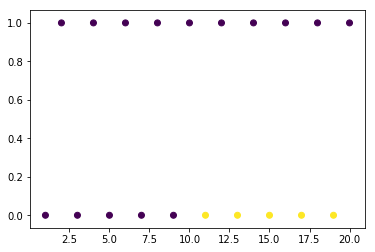

In [37]:
plt.scatter(X[:,0],X[:,1], c = y) # split on X1 < 10, and then if X2 = 0 predict class 1, otherwise, class 2

In [38]:
testClassifier.fit(X,y)

prospective split points (10.5, 0.5)
prospective info_gains (0.21576155433883565, 0.21576155433883565)
splitting at column 0, value 10.5
prospective split points (15.5, 0.5)
prospective info_gains (0.020135513550688766, 0.6931471805599453)
splitting at column 1, value 0.5


In [39]:
preds = testClassifier.predict(X)

In [40]:
preds == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Regression tree

### We can also make a tree to handle problems with a continuous outcome - a regression tree.

It will work exactly the same way as above, except the entropy function will just be the standard deviation of the dependent variable

In [49]:
class DecisionTreeRegressor:
    
    def __init__(self, min_obs=5):
        self.min_obs = min_obs
    
    def get_entropy(self, y):
        
        return np.std(y)
    
    def maximum_info_gain(self,x_j, y):
        
        data = zip(x_j,y)
        data = sorted(data, key = lambda x: x[0])
        sorted_x_j, sorted_y = zip(*data)
        sorted_x_j, sorted_y = np.array(sorted_x_j), np.array(sorted_y)
        
        info_gains = []
        for i in range(len(x_j)-1):
            split_point = (float(sorted_x_j[i]) + float(sorted_x_j[i+1]))/2
            left_x, left_y = sorted_x_j[sorted_x_j < split_point], sorted_y[sorted_x_j < split_point]
            right_x, right_y = sorted_x_j[sorted_x_j >= split_point], sorted_y[sorted_x_j >= split_point]
            
            if len(left_x) < self.min_obs or len(right_x) < self.min_obs:
                continue
            
            left_entropy = self.get_entropy(left_y)
            right_entropy = self.get_entropy(right_y)
            total_entropy = left_entropy*len(left_x)/len(x_j) + right_entropy*len(right_x)/len(x_j)
            info_gains.append((split_point, self.entropy - total_entropy))
        
        try:
            return(max(info_gains, key = lambda x:x[1]))
        except: return((0,0))
        
            
    def do_vote(self, y_vals):
        
        return np.mean(y_vals)
        
    def fit(self,X,y):
        self.X = X
        self.y = y
        self.entropy = self.get_entropy(self.y)
        self.vote = None
        self.split_point = None
        self.split_col = None
        
        if self.X.shape[0] > self.min_obs and len(np.unique(self.y))>1 :
            split_points, info_gains = zip(*[self.maximum_info_gain(self.X[:,x_j],self.y) for x_j in range(X.shape[1])])
            print('prospective split points {}'.format(split_points))
            print('prospective info_gains {}'.format(info_gains))
            max_info_gain = max(info_gains)
            
            if max_info_gain == 0:
                self.vote = self.do_vote(self.y)
                return None
                
            self.split_col = info_gains.index(max_info_gain)
            self.split_point = split_points[self.split_col]
            self.left = DecisionTreeRegressor(min_obs = self.min_obs)
            self.right = DecisionTreeRegressor(min_obs = self.min_obs)
        
            X_left, y_left = X[X[:,self.split_col] < self.split_point,:],  y[X[:,self.split_col] < self.split_point]
            X_right, y_right = X[X[:,self.split_col] >= self.split_point,:],  y[X[:,self.split_col] >= self.split_point]
            
            print('splitting at column {}, value {}'.format(self.split_col, self.split_point))
            self.left.fit(X_left, y_left)
            self.right.fit(X_right, y_right)
        else:
            self.vote = self.do_vote(self.y)
            
    def predict_one(self, row):
        
        if self.X.shape[0] > self.min_obs and len(np.unique(self.y))>1:
            if not self.split_point:
                return self.vote
            elif row[self.split_col] >= self.split_point:
                return(self.right.predict_one(row))
            else:
                return(self.left.predict_one(row))
        else:
            return(self.vote)
        
    def predict(self, X):
        
        preds = []
        for row in X:
            preds.append(self.predict_one(row))
        
        return(preds)

In [50]:
X = np.arange(-25,25).reshape(50,1)

In [51]:
y = np.array(X**3)

In [52]:
testRegressor = DecisionTreeRegressor()

In [53]:
testRegressor.fit(X,y)

prospective split points (-15.5,)
prospective info_gains (1970.0033728112921,)
splitting at column 0, value -15.5
prospective split points (-20.5,)
prospective info_gains (1873.2516025089813,)
splitting at column 0, value -20.5
prospective split points (15.5,)
prospective info_gains (2212.054609801628,)
splitting at column 0, value 15.5
prospective split points (-9.5,)
prospective info_gains (432.86399090756254,)
splitting at column 0, value -9.5
prospective split points (0,)
prospective info_gains (0,)
prospective split points (9.5,)
prospective info_gains (567.2968672151682,)
splitting at column 0, value 9.5
prospective split points (-4.5,)
prospective info_gains (97.2485635710492,)
splitting at column 0, value -4.5
prospective split points (4.5,)
prospective info_gains (128.3721728454437,)
splitting at column 0, value 4.5
prospective split points (0,)
prospective info_gains (0,)
prospective split points (0,)
prospective info_gains (0,)
prospective split points (0,)
prospective info_

In [55]:
preds = testRegressor.predict(X)

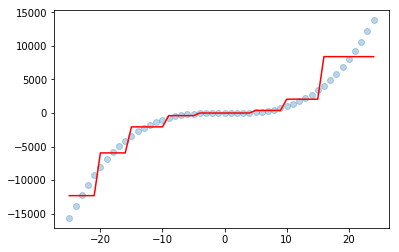

In [56]:
plt.scatter(X,y, alpha = 0.3)
plt.plot(X,preds, c = 'red')